In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from create_arrays import create_arr

In [2]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/dat/f4.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [83]:
arrs = create_arr(tube,frac,log10T,log10G,time=500)
x = arrs['x']
v = arrs['v']
T = arrs['T']
ne = arrs['ne']
wav = arrs['wav']
spec = arrs['spec']
EM = arrs['EM']

In [84]:
EM /= EM[0]
ne /= ne[0]

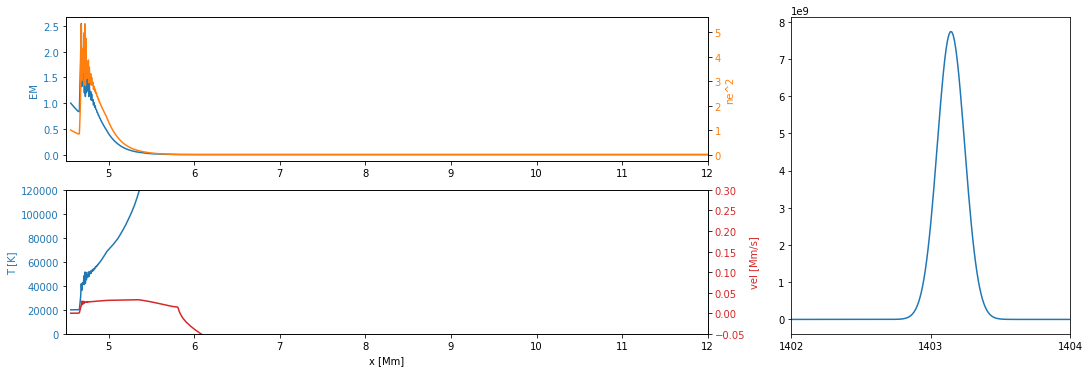

In [85]:
fig = plt.figure(figsize=(18,9))
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
plt.subplots_adjust(wspace=0.3)


ax1.plot(x,EM,label='EM',color='tab:blue')
ax1.set_xlim(4.5,12)
ax1.set_ylabel('EM', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax5 = ax1.twinx()
ax5.plot(x,ne**2,label='ne^2',color='tab:orange')
ax5.set_ylabel('ne^2',color='tab:orange')
ax5.tick_params(axis='y', labelcolor='tab:orange')


color = 'tab:blue'
ax2.plot(x,T*1e6,color=color)
ax2.set_ylim(0,1.2*1e5)
ax2.set_xlabel('x [Mm]')
ax2.set_ylabel('T [K]', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(4.5,12)


ax4 = ax2.twinx()
color = 'tab:red'
ax4.plot(x, v, color=color)
ax4.set_ylabel('vel [Mm/s]', color=color)  # we already handled the x-label with ax1
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim(-0.05,0.3)


ax3.plot(wav,spec)
ax3.set_xlim(1402,1404)
ax3.set_xticks(np.arange(1402, 1405, 1))